# **DATASET 2: Artwork Physical Attributes**

This dataset, sourced from [a GitHub repository](https://github.com/jasonshi10/art_auction_valuation/tree/master), 
provides detailed information about artworks auctioned off. It encompasses a total of 41,253 entries, each representing an individual piece of art, spanning a time period from May 13, 1985, to December 4, 2014.
It offers a deep dive into these tangible attributes, providing a comprehensive set of features that describe the physical characteristics of artworks.


**Basic Details**
- Information about the artist, including their name, country of origin, year of birth, and year of death. For instance, an artwork by “Pablo Picasso” from “Spain” is included in the dataset.

**Artwork Specifies**
- Details about the artwork itself, such as its name, the material used (e.g., “Oil on canvas”), and its dimensions (e.g., 24 inches in height and 12 inches in width).

**Visual Attributes**
- This dataset delves deep into the visual characteristics of the pieces, capturing features like the dominant color, brightness levels, unique color ratios, and percentages of high and low brightness. For example, an artwork might have a dominant color of "Green" with a mean brightness value of "129".

**Advanced Image Analysis**
- Leveraging advanced image processing techniques, the dataset provides insights into the percentage of edges and corners in the artwork, detected using the Canny Edge Detection and Harris Corner Detection algorithms, respectively. Additionally, it counts the number of faces present in the artwork's imagery.

**Auction Details**
- Information about when the artwork was sold at auction, such as “2007-05-03”.

The artworks in this dataset appear to have been sold across various auction houses, rather than being confined to a single entity. This broader scope offers a more diversified perspective on the art market dynamics.
For a more detailed insight into how the data was acquired and processed, please refer to the following [GitHub link](https://github.com/ahmedhosny/theGreenCanvas/blob/gh-pages/ImageProcessing1210.ipynb).

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = "https://raw.githubusercontent.com/jasonshi10/art_auction_valuation/master/data.txt"
df = pd.read_csv(url, delimiter='\t', low_memory=False)

In [3]:
df

,Unnamed: 0,artist,country,yearOfBirth,yearOfDeath,name,year,price,material,height,...,dominantColor,brightness,ratioUniqueColors,thresholdBlackPerc,highbrightnessPerc,lowbrightnessPerc,CornerPer,EdgePer,FaceCount,soldtime
0,0,Mario A,Swiss,1959,NaN,The world is beautyful #5,2004,5315.0,laserchrome_print_diasec,29.53,...,yellows,98.0,0.25,65.74,0.75,21.56,0.37,4.02,1.0,NaN
1,1,Mario A,Swiss,1959,NaN,The world is beautyful #13,2004,7383.0,laserchrom_print_(diasec.),29.53,...,blacks,73.0,0.19,66.17,15.21,46.50,1.52,7.28,0.0,NaN
2,2,A E Cremer,French,20thC,NaN,Spot Lights,NaN,2090.0,black-painted_metal,NaN,...,whites,212.0,0.05,20.17,0.00,17.56,0.39,4.15,0.0,NaN
3,3,A G Schultz & Co.,American,est1890s,NaN,Sugar/Sweetmeat Baskets,NaN,615.0,Sterling_Silver,6.5,...,blacks,73.0,0.18,83.00,13.74,35.74,3.58,13.13,0.0,NaN
4,4,A G Schultz & Co.,American,est1890s,NaN,An American Silver Five-piece Tea And Coffee S...,1908,8125.0,silver,NaN,...,whites,216.0,0.02,11.26,0.00,6.27,1.25,12.95,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41248,41290,Mark Rothko,American,1903.0,1970.0,Untitled,1961,1700000.0,oil_on_canvas,93.0,...,reds,107.0,0.06,98.99,0.00,0.00,0.14,0.32,0.0,1997-11-18 00:00:00
41249,41291,Mark Rothko,American,1903.0,1970.0,Untitled,1968,300000.0,acrylic_on_paper_on_canvas,24.0,...,reds,134.0,0.10,68.56,0.00,0.00,0.56,0.45,0.0,1997-11-18 00:00:00
41250,41292,Mark Rothko,American,1903.0,1970.0,Untitled,1959,280000.0,oil_on_paper_laid_on_masonite,38.0,...,blacks,110.0,0.07,53.48,0.66,47.50,0.14,1.07,0.0,1997-11-18 00:00:00
41251,41293,Mark Rothko,American,1903.0,1970.0,"Green, White, Green on Blue",1969,322938.0,oil_on_paper_on_board,71.0,...,blacks,25.0,0.08,94.98,9.47,42.95,0.22,1.97,0.0,1995-11-29 00:00:00


# Analysis of Artwork Dataset

## Introduction

### Variables in the Dataset:

1. **Unnamed: 0**: A unique identifier for each entry.
2. **artist**: The name of the artist who created the artwork.
3. **country**: The country of origin of the artist.
4. **yearOfBirth**: The birth year of the artist.
5. **yearOfDeath**: The year the artist passed away.
6. **name**: The title of the artwork.
7. **year**: The year the artwork was created.
8. **price**: The price at which the artwork was auctioned off.
9. **material**: The material used for the artwork.
10. **height**: The height of the artwork.
11. **width**: The width of the artwork.
12. **link**: A link to the artwork's webpage.
13. **source**: The source from which the information was obtained.
14. **dominantColor**: The dominant color in the artwork.
15. **brightness**: The brightness of the artwork.
16. **ratioUniqueColors**: The ratio of unique colors in the artwork.
17. **thresholdBlackPerc**: The percentage of black color in the artwork.
18. **highbrightnessPerc**: The percentage of high brightness in the artwork.
19. **lowbrightnessPerc**: The percentage of low brightness in the artwork.
20. **CornerPer**: The percentage of corners in the artwork.
21. **EdgePer**: The percentage of edges in the artwork.
22. **FaceCount**: The number of faces detected in the artwork.
23. **soldtime**: The date and time of the auction sale.

In [4]:
print(f"The dataset has {df.shape[0]} observations and {df.shape[1]} variables.")

The dataset has 41253 observations and 23 variables.


In [5]:
# Convert the 'soldtime' column to datetime format
df['soldtime'] = pd.to_datetime(df['soldtime'], errors='coerce')

min_date = df['soldtime'].min()
max_date = df['soldtime'].max()
print(f"Earliest sold time: {min_date}")
print(f"Latest sold time: {max_date}")

Earliest sold time: 1985-05-13 00:00:00
Latest sold time: 2014-12-04 00:00:00


## Data Cleaning and Feature Selection

In the initial phase of our analysis, I decided to focus solely on the physical attributes of the artworks. This decision was driven by my objective to understand how tangible characteristics of an artwork might influence its value or other related factors.

Given this focus, several columns in the dataset were deemed not directly relevant to our analysis. Here's a breakdown of the columns we dropped and the rationale behind each:

- **Unnamed: 0**: This appears to be an auto-generated index or identifier. It doesn't provide any meaningful information about the artworks themselves.
  
- **Country**: While the country of origin or the country associated with an artwork might have some influence on its value or perception, it's not a physical attribute of the artwork.
  
- **YearOfBirth** and **YearOfDeath**: These columns pertain to the artist's birth and death years. While they could be significant in a broader analysis (e.g., understanding the impact of an artist's age or lifespan on their work's value), they don't relate to the physical attributes of the artworks.
  
- **Year**: This likely refers to the year the artwork was created. While it's a temporal attribute of the artwork, it's not a physical one.
  
- **Link**: URLs or links to external sources don't provide any direct physical information about the artworks.
  
- **Source**: The source from which the data was obtained doesn't offer insights into the physical characteristics of the artworks.

By narrowing this dataset to only include columns that describe the artworks' physical attributes, I aim to derive more focused and potentially actionable insights from my analysis.

In [6]:
df = df.rename(columns={"name": "title"})

In [7]:
columns_to_drop = ['Unnamed: 0', 'country', 'yearOfBirth', 'yearOfDeath', 'year', 'link', 'source']
df = df.drop(columns=columns_to_drop)
df.head()

,artist,title,price,material,height,width,dominantColor,brightness,ratioUniqueColors,thresholdBlackPerc,highbrightnessPerc,lowbrightnessPerc,CornerPer,EdgePer,FaceCount,soldtime
0,Mario A,The world is beautyful #5,5315.0,laserchrome_print_diasec,29.53,39.37,yellows,98.0,0.25,65.74,0.75,21.56,0.37,4.02,1.0,NaT
1,Mario A,The world is beautyful #13,7383.0,laserchrom_print_(diasec.),29.53,39.37,blacks,73.0,0.19,66.17,15.21,46.50,1.52,7.28,0.0,NaT
2,A E Cremer,Spot Lights,2090.0,black-painted_metal,NaN,NaN,whites,212.0,0.05,20.17,0.00,17.56,0.39,4.15,0.0,NaT
3,A G Schultz & Co.,Sugar/Sweetmeat Baskets,615.0,Sterling_Silver,6.5,5.75,blacks,73.0,0.18,83.00,13.74,35.74,3.58,13.13,0.0,NaT
4,A G Schultz & Co.,An American Silver Five-piece Tea And Coffee S...,8125.0,silver,NaN,NaN,whites,216.0,0.02,11.26,0.00,6.27,1.25,12.95,0.0,NaT


### 3. Handling Missing Values:
A check for missing values revealed that some columns, such as `height`, `width`, and `soldtime`, have missing entries.  
To maintain the integrity of the dataset, rows with missing values were dropped.

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

artist                    0
title                     0
price                     0
material                  0
height                 2511
width                  2511
dominantColor             0
brightness                0
ratioUniqueColors         0
thresholdBlackPerc        0
highbrightnessPerc        0
lowbrightnessPerc         0
CornerPer                 0
EdgePer                   0
FaceCount                 0
soldtime              23074
dtype: int64


In [9]:
df = df.dropna()
print(f"After dropping missing values, the dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

After dropping missing values, the dataset has 18065 rows and 16 columns.


In [10]:
print(df.dtypes)

artist                        object
title                         object
price                        float64
material                      object
height                        object
width                         object
dominantColor                 object
brightness                   float64
ratioUniqueColors            float64
thresholdBlackPerc           float64
highbrightnessPerc           float64
lowbrightnessPerc            float64
CornerPer                    float64
EdgePer                      float64
FaceCount                    float64
soldtime              datetime64[ns]
dtype: object


In [11]:
# Convert 'height' and 'width' columns to numeric type
df['height'] = pd.to_numeric(df['height'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df = df.dropna()

### 📊 Numerical Variables:
- `price`
- `height`
- `width`
- `brightness`
- `ratioUniqueColors`
- `thresholdBlackPerc`
- `highbrightnessPerc`
- `lowbrightnessPerc`
- `CornerPer`
- `EdgePer`
- `FaceCount`

### 📝 String (Object) Variables:
- `artist`
- `name`
- `material`
- `dominantColor`
- `soldtime`

## Analysis of Artwork Dataset

### 1. Splitting the Dataset:
The dataset was divided into two distinct subsets:
- **Famous Artists Dataset**: Contains artworks from renowned artists such as Pablo Picasso, Andy Warhol, Gustav Klimt, and others.
- **Other Artists Dataset**: Comprises artworks from lesser-known artists.

In [12]:
# Define the list of famous artists
famous_artists = ['Pablo Picasso', 'Andy Warhol', 'Gustav Klimt', 'Paul Cezanne', 'Edvard Munch', 'Vincent van Gogh', 'Mark Rothko']

# Split the dataset into famous and other artists
df_famous_artists = df[df['artist'].isin(famous_artists)]
df_other_artists = df[~df['artist'].isin(famous_artists)]

In [13]:
# Print the number of observations for each dataset
print(f"Number of observations for famous artists: {df_famous_artists.shape[0]}")
print(f"Number of observations for other artists: {df_other_artists.shape[0]}")

Number of observations for famous artists: 17280
Number of observations for other artists: 784


In [14]:
min_year = df_other_artists['soldtime'].min()
max_year = df_other_artists['soldtime'].max()

print(f"The dataset spans from {min_year} to {max_year}.")

The dataset spans from 2000-06-17 00:00:00 to 2014-11-18 00:00:00.


### 2. Analyzing the `price` Variable:
For the "Other Artists Dataset", I delved into the `price` variable:
- **Descriptive Statistics**: Computed and examined the descriptive statistics of the `price` variable.
- **Transformation**: Addressed the skewed distribution by transforming the `price` using the natural logarithm (`np.log1p`).
- **Most Expensive Artworks**: Identified artists associated with the most expensive artworks.

In [15]:
df_other_artists = df_other_artists.copy()
df_other_artists['log_price'] = np.log(df_other_artists['price'])

count        784.00
mean      590782.93
std      2541426.57
min          100.00
25%         8750.00
50%        14339.00
75%        44062.50
max     32085000.00
Name: price, dtype: float64


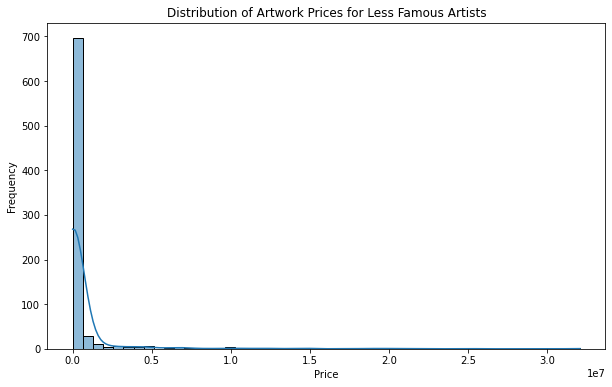

In [16]:
pd.options.display.float_format = '{:.2f}'.format
print(df_other_artists['price'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df_other_artists['price'], bins=50, kde=True)
plt.title('Distribution of Artwork Prices for Less Famous Artists')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

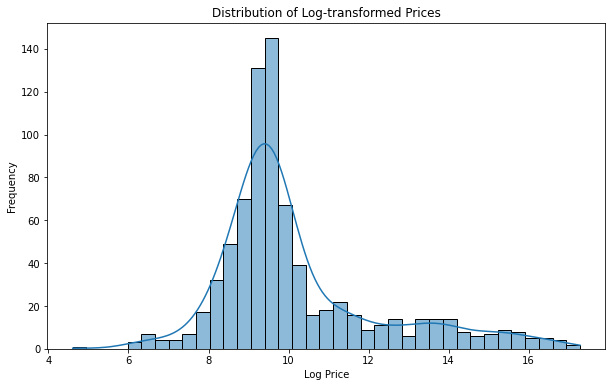

In [17]:
df_other_artists.loc[:, 'log_price'] = np.log(df_other_artists['price'])

plt.figure(figsize=(10, 6))
sns.histplot(df_other_artists['log_price'], kde=True)
plt.title('Distribution of Log-transformed Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Sort the dataframe by price in descending order and select the top few rows
top_artists = df_other_artists.sort_values(by='price', ascending=False).head(10)
# Display the artists and the associated prices
print(top_artists[['artist', 'price']])

                  artist       price
39881  Willem de Kooning 32085000.00
39876  Willem de Kooning 24805000.00
39846  Willem de Kooning 21165000.00
39965  Willem de Kooning 19682500.00
39936  Willem de Kooning 19163750.00
39814  Willem de Kooning 17525000.00
39815  Willem de Kooning 14725000.00
39882  Willem de Kooning 14725000.00
39994  Willem de Kooning 14082500.00
39984  Willem de Kooning 12402500.00


## CORRELATION MAP

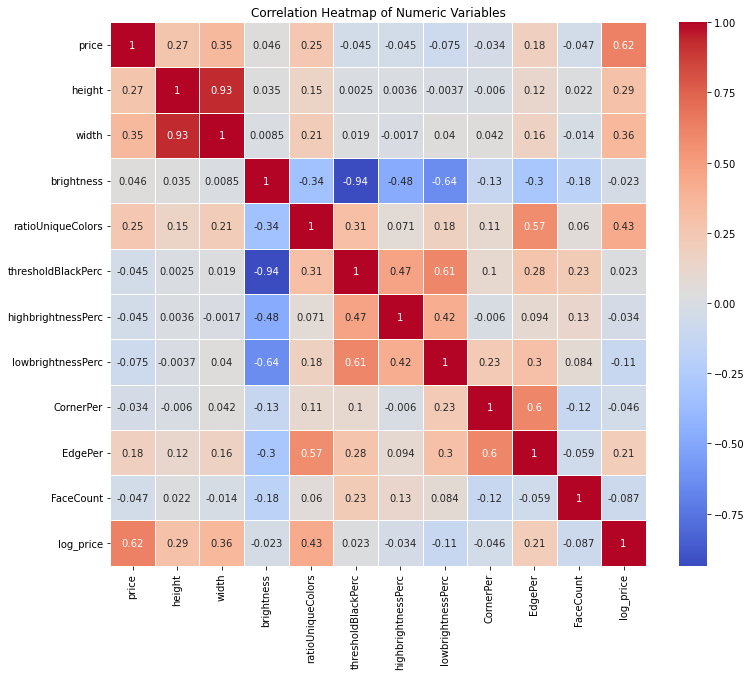

In [19]:
numeric_columns = df_other_artists.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [54]:
print(correlation_matrix)

                    price  height  width  brightness  ratioUniqueColors  \
price                1.00    0.27   0.35        0.05               0.25   
height               0.27    1.00   0.93        0.03               0.15   
width                0.35    0.93   1.00        0.01               0.21   
brightness           0.05    0.03   0.01        1.00              -0.34   
ratioUniqueColors    0.25    0.15   0.21       -0.34               1.00   
thresholdBlackPerc  -0.05    0.00   0.02       -0.94               0.31   
highbrightnessPerc  -0.05    0.00  -0.00       -0.48               0.07   
lowbrightnessPerc   -0.08   -0.00   0.04       -0.64               0.18   
CornerPer           -0.03   -0.01   0.04       -0.13               0.11   
EdgePer              0.18    0.12   0.16       -0.30               0.57   
FaceCount           -0.05    0.02  -0.01       -0.18               0.06   
log_price            0.62    0.29   0.36       -0.02               0.43   

                    thre

### Variance Inflation Factor (VIF) Analysis

The **Variance Inflation Factor (VIF)** provides a measure of how much the variance of an estimated regression coefficient increases when the predictors are correlated. 
If no factors are correlated, the VIFs will all be equal to 1.
A VIF value greater than 10 is typically considered an indication of high multicollinearity.

In [20]:
numeric_columns_const = sm.add_constant(numeric_columns)
vif_data = pd.DataFrame()
vif_data['Variable'] = numeric_columns_const.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_columns_const.values, i) for i in range(numeric_columns_const.shape[1])]
print(vif_data)

              Variable    VIF
0                const 339.87
1                price   1.76
2               height   7.67
3                width   8.21
4           brightness   9.22
5    ratioUniqueColors   2.11
6   thresholdBlackPerc   8.43
7   highbrightnessPerc   1.37
8    lowbrightnessPerc   1.93
9            CornerPer   1.91
10             EdgePer   2.79
11           FaceCount   1.12
12           log_price   2.04


- The `brightness`, `thresholdBlackPerc`, `height` and `width` variables have VIF values close to the threshold of 10, indicating potential multicollinearity issues.
- Other variables have VIF values below 10, suggesting they are not highly correlated with other predictors in the model.
In summary, none of the variables show concerning signs of multicollinearity as all VIFs are well below common thresholds. Thus, there should be no issues in including all these variables in the regression model.

## Decision to Exclude Variables for Model Building

During the analysis of correlations between the variables of the dataset, I carefully considered the relevance and impact of certain variables to make informed decisions about model construction. One key aspect of this decision-making process was the potential presence of multicollinearity among variables, which could affect the model's performance and interpretability.

After reviewing the correlation results, here are the key factors influencing my decision:

- **Multicollinearity Concerns**: In this dataset, `thresholdBlackPerc` and `brightness` were negatively correlated, indicating that as one increased, the other decreased. This strong negative correlation could potentially lead to multicollinearity issues.
- **Redundant Information**: The variables `highbrightnessPerc` and `lowbrightnessPerc` seem to provide redundant information given the presence of the `brightness`.

Given these considerations, I have made the decision to exclude the following variables from our model since their inclusion in the model may not provide substantial predictive power:

1. **Threshold Black Percentage (`thresholdBlackPerc`)**

2. **High Brightness Percentage (`highbrightnessPerc`)**

3. **Low Brightness Percentage (`lowbrightnessPerc`)**

By removing these variables, I aim to streamline the model, enhance its interpretability, and reduce the risk of multicollinearity. 

In [21]:
variables_to_remove = ["thresholdBlackPerc", "highbrightnessPerc", "lowbrightnessPerc"]
df_other_artists = df_other_artists.drop(variables_to_remove, axis=1)
df_other_artists

,artist,title,price,material,height,width,dominantColor,brightness,ratioUniqueColors,CornerPer,EdgePer,FaceCount,soldtime,log_price
4982,John Cage,Merce Cunningham Portfolio,10521.00,suite_with_7_graphic_works,29.92,22.05,grays,87.00,0.23,1.41,17.86,0.00,2013-11-12,9.26
4983,John Cage,Merce Cunningham Portfolio,10521.00,suite_with_7_graphic_works,29.92,22.05,blacks,87.00,0.23,1.41,17.86,0.00,2013-11-12,9.26
23150,After Pablo Picasso,Les Saltimbanques,23750.00,Color_etching_and_aquatint,23.50,16.73,whites,151.00,0.13,0.59,6.60,0.00,2014-09-23,10.08
23151,After Pablo Picasso,MaternitÃ©,23750.00,Color_aquatint_and_etching,25.59,16.73,cyans,131.00,0.29,0.45,8.50,0.00,2014-09-23,10.08
23152,After Pablo Picasso,L'Ãtreinte,11875.00,Color_collotype_and_stencil_coloring,20.35,21.65,grays,124.00,0.18,0.09,4.68,0.00,2014-09-23,9.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40187,Willem de Kooning,Untitled IV,12081000.00,oil_on_canvas,70.00,80.00,whites,181.00,0.56,1.59,16.08,0.00,2008-05-13,16.31
40188,Willem de Kooning,With love,4400.00,lithograph_on_Arches_paper,15.75,12.60,whites,212.00,0.04,0.83,7.30,0.00,2008-05-07,8.39
40189,Willem de Kooning,Untitled (Spoleto),121000.00,ink_on_paper_mounted_on_card,25.98,18.90,whites,211.00,0.18,10.37,18.04,0.00,2008-04-02,11.70
40190,Willem de Kooning,Untitled,40000.00,oil_and_charcoal_on_paper,24.02,19.02,yellows,205.00,0.10,1.11,4.71,0.00,2008-04-02,10.60


## Decision to transform Variables for Model Building
### `height` and `width` 

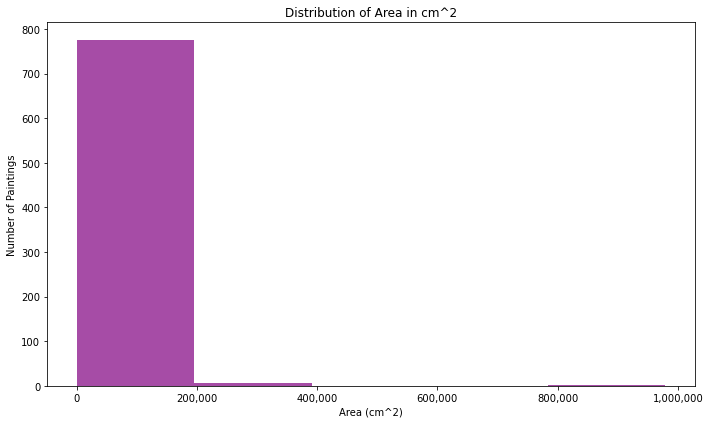

In [22]:
# from inches to cm 
df_other_artists['height_cm'] = df_other_artists['height'] * 2.54
df_other_artists['width_cm'] = df_other_artists['width'] * 2.54
# Calculate the area in square centimeters
df_other_artists['area_cm'] = df_other_artists['height_cm'] * df_other_artists['width_cm']

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_other_artists['area_cm'], bins=5, color='purple', alpha=0.7)
ax.set_title('Distribution of Area in cm^2')
ax.set_xlabel('Area (cm^2)')
ax.set_ylabel('Number of Paintings')
ax.get_xaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))  # Add commas for thousands
plt.tight_layout()
plt.show()

# `dominantColor` Variable

The `dominantColor` variable was derived by analyzing the artworks' images to pinpoint their prevailing color.Initially, the image is fetched from a specific URL and opened for scrutiny. Using the kmeans clustering algorithm, the image's RGB values are grouped into a predefined number of clusters. This clustering helps to aggregate similar colors together. Once clustering is done, a histogram is created to count the occurrences of each color cluster. The cluster with the highest count is deemed the image's dominant color.

Subsequently, the RGB value of this dominant color is converted into the HSL (Hue, Saturation, Lightness) format. This conversion facilitates the categorization of the color based on its hue and brightness. Finally, the HSL value is bucketed into predefined categories such as blacks, whites, grays, reds, yellows, and so forth. The end result is a label indicating the artwork's dominant color category, providing a high-level understanding of the primary color hue present in the artwork.

### Analysis

**Key Findings:**

- **Distribution of Dominant Colors:** 
  - We visualized the distribution of dominant colors in the artworks. The bar chart provides a clear representation of the number of artworks associated with each dominant color.

- **Merging Categories:** 
  - Based on the analysis, certain color categories were merged to simplify the dataset. For instance:
    * All artworks with "magentas" as the dominant color were merged into the "reds" category.
    * Those with "cyans" were merged into the "blues" category.

In [23]:
unique_colors = df_other_artists['dominantColor'].unique()
print(unique_colors)

['grays' 'blacks' 'whites' 'cyans' 'yellows' 'reds' 'blues' 'magentas']


In [24]:
color_counts = df_other_artists['dominantColor'].value_counts()
print(color_counts)

df_other_artists['dominantColor'] = df_other_artists['dominantColor'].replace('magentas', 'reds')
df_other_artists['dominantColor'] = df_other_artists['dominantColor'].replace('cyans', 'blues')


whites      424
yellows     135
grays       130
blacks       60
reds         28
blues         4
cyans         2
magentas      1
Name: dominantColor, dtype: int64


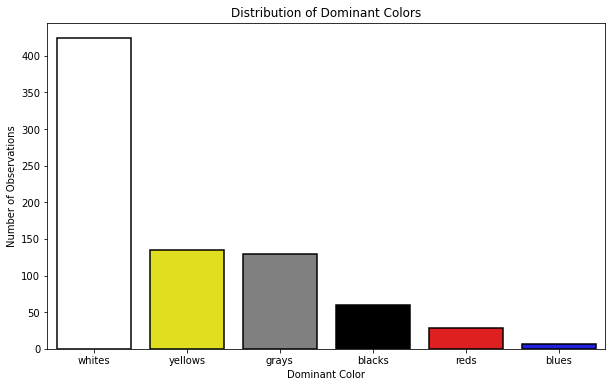

In [25]:
color_mapping = {
    'yellows': 'yellow',
    'grays': 'gray',
    'reds': 'red',
    'blues': 'blue',
    'whites': 'white',
    'blacks': 'black' 
}


for category in df_other_artists['dominantColor'].unique():
    if category not in color_mapping:
        print(f"Warning: {category} not in color_mapping!")


dominant_color_counts = df_other_artists['dominantColor'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=dominant_color_counts.index, y=dominant_color_counts.values, palette=color_mapping, edgecolor='black', linewidth=1.5)
plt.title('Distribution of Dominant Colors')
plt.xlabel('Dominant Color')
plt.ylabel('Number of Observations')
plt.show()


# Analysis of the `material` Variable

## Data Exploration

- Initially, I explored the unique values within the `material` column to understand its composition.

In [ ]:
unique_material = df_other_artists['material'].unique()
num_unique_material = len(unique_material)
unique_material, num_unique_material

## Keyword Categorization

- Based on the unique values, I identified several keywords that could be used to categorize the materials into broader categories.
- The categories and their associated keywords were defined as:
  - Prints and Lithographs: `lithograph`, `offset`, `print`, `collotype`, `pochoir`, `serigraph`, `screenprint`
  - Etchings and Aquatints: `etching`, `aquatint`
  - Drawings: `pencil`, `charcoal`, `ink`, `chalk`, `graphite`, `drawing`
  - Paintings: `oil`, `acrylic`, `gouache`, `watercolor`, `tempera`, `pastel`, `paint`
  - Mixed Media: `mixed media`, `collage`, `enamel`
  - Others: Any material that did not fit into the above categories.

## Application of Categorization Function

- A function named `categorize_value` was created to categorize each unique value in the `material` column based on the defined keywords.
- This function was then applied to the `material` column to create a new column named `material_category` in the dataset.

In [27]:
categories = {
    'Prints and Lithographs': ['lithograph', 'offset', 'print', 'collotype', 'pochoir', 'serigraph', 'screenprint'],
    'Etchings and Aquatints': ['etching', 'aquatint'],
    'Drawings': ['pencil', 'charcoal', 'ink', 'chalk', 'graphite', 'drawing'],
    'Paintings': ['oil', 'acrylic', 'gouache', 'watercolor', 'tempera', 'pastel', 'paint'],
    'Mixed Media': ['mixed media', 'collage', 'enamel'],
    'Others': []
}


def categorize_value(value):
    for category, keywords in categories.items():
        if any(keyword in value.lower().replace('_', ' ').replace('-', ' ') for keyword in keywords):
            return category
    return 'Others'

df_other_artists['material_category'] = df_other_artists['material'].apply(categorize_value)

In [28]:
df_other_artists = df_other_artists.drop(columns=["material"], errors='ignore')

## Visualization

- A pie chart was generated to visualize the distribution of observations by material category. This helped in understanding the proportion of each category within the dataset.

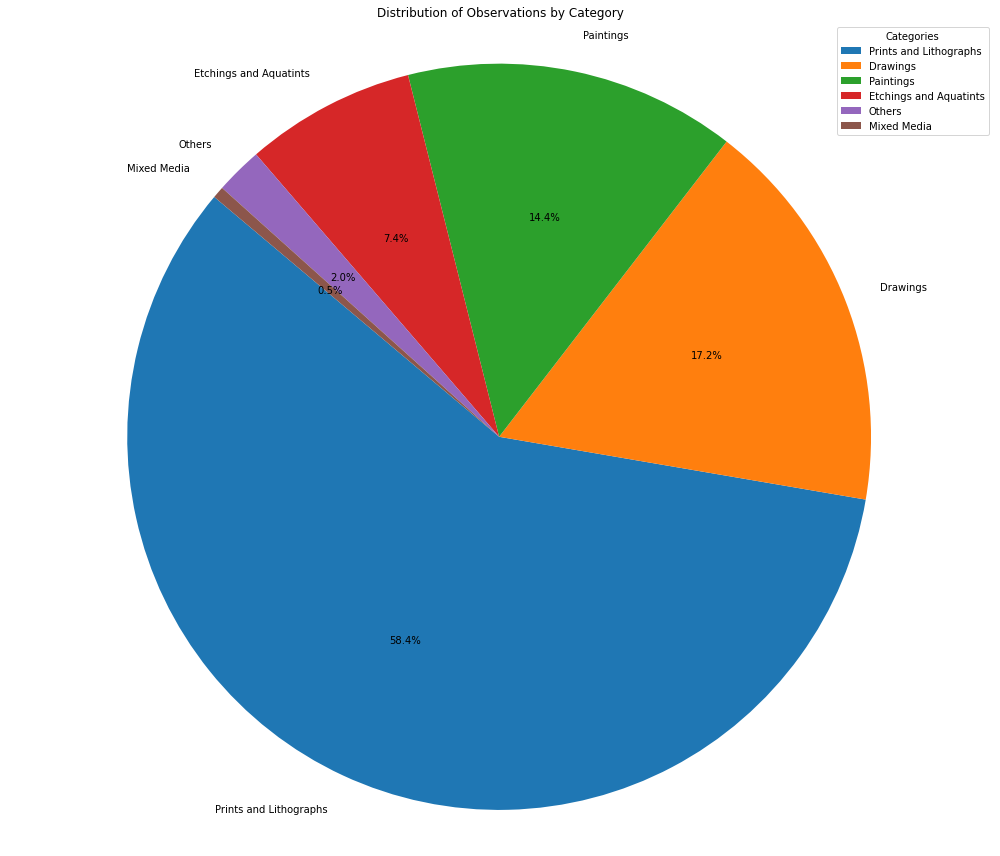

In [29]:
category_counts = df_other_artists['material_category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(14, 12))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Observations by Category')
plt.legend(category_counts.index, title="Categories", loc="best")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# `brightness` Variable

## Grayscale Conversion
The author converted the artwork image into grayscale, where black is represented as 0, and white is represented as 255. This transformation simplifies the analysis of brightness.

## Calculation of Average Brightness
After the conversion to grayscale, the author calculated the average brightness of the image. This was done by taking the mean of the brightness values of all pixels in the grayscale image.

## Result
The "brightness" variable represents the average brightness value of the image, where a higher value indicates a brighter artwork, and a lower value indicates a darker artwork.

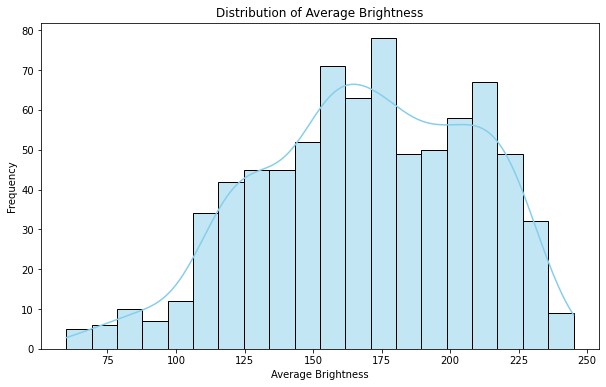

In [30]:
brightness_stats = df_other_artists['brightness'].describe()

plt.figure(figsize=(10, 6))
sns.histplot(df_other_artists['brightness'], bins=20, kde=True, color='skyblue')
plt.xlabel('Average Brightness')
plt.ylabel('Frequency')
plt.title('Distribution of Average Brightness')
plt.show()

In [31]:
brightness_stats = df_other_artists["brightness"].describe()
print(brightness_stats)

count   784.00
mean    168.96
std      38.90
min      60.00
25%     141.00
50%     170.50
75%     200.00
max     245.00
Name: brightness, dtype: float64


## Summary of Descriptive Statistics for Brightness

The descriptive statistics for the variable "brightness" provide valuable insights into the luminosity of the artworks in our analysis. Below are the key findings:

- **Mean**: The mean brightness value is approximately 168.96. This value represents the average luminosity of the artworks in our dataset. In practical terms, it signifies the central point around which the brightness of the artworks tends to cluster.

- **Standard Deviation**: With a standard deviation of around 38.90, there is moderate variability in the brightness of the artworks. This measure quantifies how the brightness values spread out from the mean.

- **Minimum and Maximum Values**: The minimum brightness value observed is 60.00, while the maximum is 245.00. These values signify the range of luminosity within the artworks. The minimum value represents the darkest extreme, while the maximum represents the brightest.

In summary, the "brightness" values represent the average luminosity of the artworks in our dataset, ranging from 0 (complete black) to 255 (complete white). The mean brightness of approximately 168.96 indicates that, on average, the artworks tend to be moderately bright. The standard deviation suggests moderate variability in brightness, with artworks spanning a range from relatively dark to relatively bright.

# `ratioUniqueColors` Variable

The "ratioUniqueColors" variable represents the ratio of unique colors to total pixels in an image. It provides a measure of color diversity in the image.

- **Unique Color List**: Initially, a list of all unique colors present in the image is generated by sampling pixel colors. Duplicate colors are removed from this list.

- **Counting Unique Colors**: The number of unique colors in the list is calculated.

- **Ratio Calculation**: The ratio of unique colors to the total number of pixels in the image is then computed.

## Interpretation of "ratioUniqueColors"

The "ratioUniqueColors" variable serves as a measure of color richness and diversity within an image. Its interpretation is as follows:

- A high "ratioUniqueColors" value, close to 1, suggests that the image is very colorful and diverse, with many unique colors. Each pixel in the image tends to have its own distinct color, resulting in a vibrant and varied visual composition.

- A low "ratioUniqueColors" value, closer to 0, indicates that the image has a limited color palette. It is likely dominated by large regions of uniform or very similar colors, potentially leading to a more subdued or monochromatic appearance.

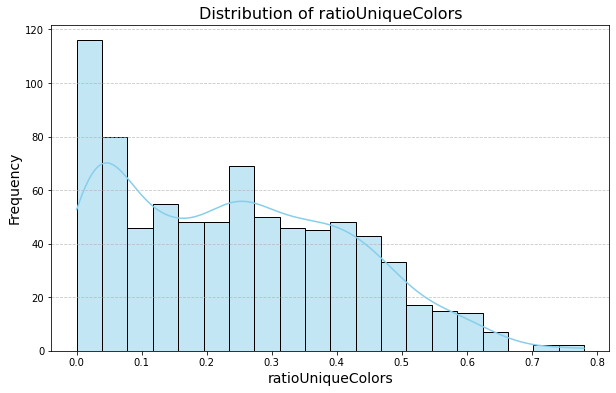

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_other_artists, x='ratioUniqueColors', bins=20, color='skyblue', kde=True)
plt.title('Distribution of ratioUniqueColors', fontsize=16)
plt.xlabel('ratioUniqueColors', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# `CornerPer` Variable

## Harris Corner Detection

### What is a Corner?
A corner in an image is the intersection of two edges. It's a point where the direction of both these edges changes. This means that when you move in any direction around a corner point, the intensity of the image changes significantly. This property makes corners highly interesting features in images, as they are typically invariant to rotation, scale, and illumination changes.

### Why Detect Corners?
Corners are often used in computer vision tasks because they are unique and can be easily tracked, making them useful for tasks like image recognition, stitching, and tracking.

### How Does Harris Corner Detection Work?
Harris Corner Detection identifies corners by observing significant variations in image gradients:

- The image is converted to grayscale for simpler computation.
- Gradients are computed for each pixel in x and y directions.
- A corner response score is calculated for each pixel using a specific formula.
- Thresholding identifies strong corners, considering only those with scores above a certain percentage of the maximum.
- Identified corners are marked on the image, typically in blue.

### Interpretation of the `CornerPer` Variable
The `CornerPer` variable, as described, seems to represent the ratio of pixels identified as corners in the entire image. This can be a measure of the complexity or the amount of detail in the painting. A higher `CornerPer` value might indicate a painting with more intricate details, patterns, or textures, while a lower value might suggest a more minimalist or smooth painting.

In summary, the Harris Corner Detection method is a powerful tool in computer vision, and the `CornerPer` variable derived from it can provide valuable insights into the characteristics and intricacies of paintings.

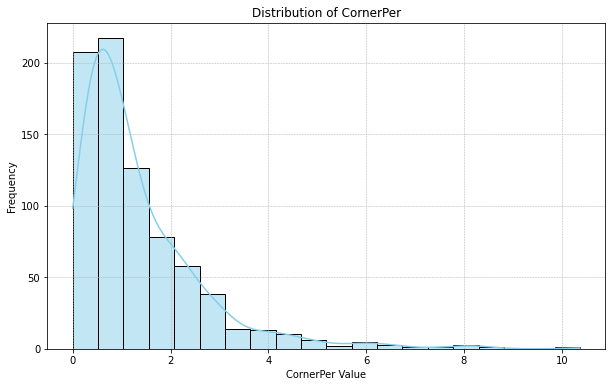

count   784.00
mean      1.35
std       1.30
min       0.00
25%       0.50
50%       0.94
75%       1.81
max      10.37
Name: CornerPer, dtype: float64

In [33]:
desc_stats = df_other_artists['CornerPer'].describe()

plt.figure(figsize=(10, 6))
sns.histplot(data= df_other_artists,x='CornerPer', bins=20, color='skyblue', kde=True)
plt.title('Distribution of CornerPer')
plt.xlabel('CornerPer Value')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

desc_stats

Based on 784 observations, on average, 1.35% of pixels in an image are identified as corners.
The distribution of values ranges from a minimum of 0.00% (no corners detected) to a maximum of 10.37%.
Half of the images have a corner percentage between 0.50% and 1.81%, with a median of 0.94%

# `EdgePer` Variable

## Edge Detection with the Canny Algorithm

### What is Edge Detection?
- **Definition**: Edge detection identifies points in an image where brightness changes sharply, often indicating object boundaries.

### Why Canny Edge Detection?
- **Robustness**: The Canny algorithm is both robust and tunable.
- **Process**: It detects rapid intensity changes in images through several steps, including noise reduction, gradient computation, non-maximum suppression, double thresholding, and edge tracking.

### Interpretation of `EdgePer`:
- **Representation**: `EdgePer` represents the percentage of pixels identified as edges in an image.
- **High Value**: A higher `EdgePer` suggests more intricate details or patterns in the painting.
- **Low Value**: A lower `EdgePer` indicates a more minimalist or smoother artwork.

**Conclusion**: The Canny algorithm offers a powerful tool for analyzing the intricacies of paintings, and the `EdgePer` variable provides insights into the artwork's characteristics.

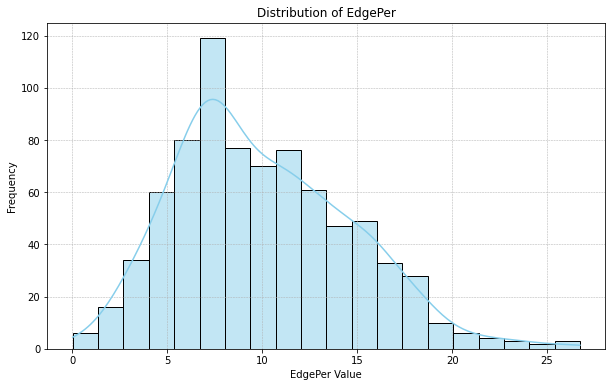

count   784.00
mean     10.03
std       4.64
min       0.01
25%       6.69
50%       9.36
75%      13.21
max      26.73
Name: EdgePer, dtype: float64

In [34]:
desc_stats = df_other_artists['EdgePer'].describe()

plt.figure(figsize=(10, 6))
sns.histplot(data= df_other_artists, x= 'EdgePer', bins=20, color='skyblue', kde=True )
plt.title('Distribution of EdgePer')
plt.xlabel('EdgePer Value')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

desc_stats

Based on 784 observations, on average, 10.03% of pixels in an image are identified as edges.
The distribution of values ranges from a minimum of 0.01% to a maximum of 26.73%.
Half of the images have an edge percentage between 6.69% and 13.21%, with a median of 9.36%.

In summary, while images tend to have a relatively low percentage of corners, they feature a significantly higher percentage of edges. This suggests that although corners are less common features in images, edges are much more prevalent.

# Analysis of `FaceCount` Variable

## Background
The `FaceCount` variable represents the number of faces detected in each painting using the Haar-cascade Detection in OpenCV. This method helps determine whether a painting resembles a portrait or has elements that can be recognized as human faces. 
The motivation behind this is to test if paintings that are somewhat recognizable as having human or face elements have a different influence on the price.

In [35]:
desc_stats = df_other_artists['FaceCount'].describe()
print(desc_stats)

count   784.00
mean      0.08
std       0.31
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       4.00
Name: FaceCount, dtype: float64


count   784.00
mean      0.08
std       0.31
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       4.00
Name: FaceCount, dtype: float64


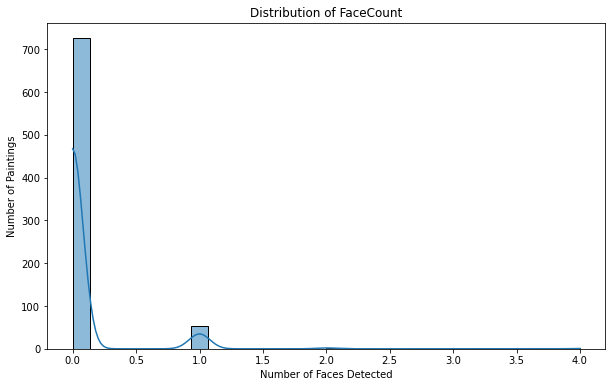

In [36]:
desc_stats = df_other_artists['FaceCount'].describe()
print(desc_stats)

plt.figure(figsize=(10,6))
sns.histplot(df_other_artists['FaceCount'], kde=True, bins=30)
plt.title('Distribution of FaceCount')
plt.xlabel('Number of Faces Detected')
plt.ylabel('Number of Paintings')
plt.show()

## Transformation
Given the nature of the data and the distribution of the `FaceCount` variable, it was transformed into a binary variable named `HasFace`. This new variable indicates whether a painting has at least one face (`1`) or no faces (`0`).

In [37]:
df_other_artists['HasFace'] = df_other_artists['FaceCount'].apply(lambda x: 1 if x > 0 else 0)

## Distribution

In [38]:
face_counts = df_other_artists['HasFace'].value_counts()
print(face_counts)

0    726
1     58
Name: HasFace, dtype: int64


Upon examining the distribution of the `HasFace` variable:

- A majority of paintings do not have recognizable faces.
- A smaller portion of paintings have at least one recognizable face.

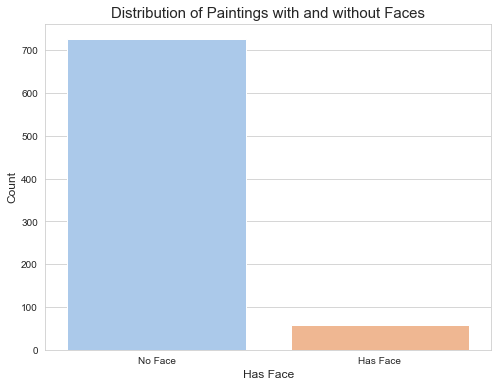

In [39]:
# Set the style for the plot
sns.set_style("whitegrid")

# Plot the counts
plt.figure(figsize=(8, 6))
sns.countplot(x='HasFace', data=df_other_artists, palette="pastel")
plt.title('Distribution of Paintings with and without Faces', fontsize=15)
plt.xlabel('Has Face', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Face', 'Has Face'], fontsize=10)
plt.show()

This binary representation simplifies the analysis and can provide clearer insights, especially when analyzing the influence of having a face on the price of a painting.

# HEDONIC MODEL

## Data Preprocessing for `df_other_artists`

### 1. Dropping Unnecessary Columns

Initially, we removed columns that are not required for our analysis. The columns dropped are:
- `artist`
- `title`
- `price`
- `height`
- `width`
- `height_cm`
- `width_cm`
- `FaceCount`
- `soldtime`

In [40]:
df_other_artists = df_other_artists.drop(columns=['artist', 'title','price', 'height', 'width', 'height_cm','width_cm', 'FaceCount', 'soldtime'])

### 2. One-Hot Encoding

We applied one-hot encoding to the categorical variables `dominantColor` and `material_category` to convert them into a format that can be provided to machine learning algorithms to improve predictions.

In [41]:
df_other_artists = pd.get_dummies(df_other_artists, columns=['dominantColor', 'material_category'])

### 3. Dropping Reference Categories

For the purpose of avoiding multicollinearity in our regression model, we dropped one category from each of the dummy variable sets:
- Dropped `dominantColor_whites` from the `dominantColor` dummies.
- Dropped `material_category_Prints and Lithographs` from the `material_category` dummies.

In [42]:
df_other_artists = df_other_artists.drop('dominantColor_whites', axis=1)
df_other_artists = df_other_artists.drop('material_category_Prints and Lithographs', axis=1)

The final columns in the processed dataset are:

In [43]:
print(df_other_artists.columns)

Index(['brightness', 'ratioUniqueColors', 'CornerPer', 'EdgePer', 'log_price',
       'area_cm', 'HasFace', 'dominantColor_blacks', 'dominantColor_blues',
       'dominantColor_grays', 'dominantColor_reds', 'dominantColor_yellows',
       'material_category_Drawings',
       'material_category_Etchings and Aquatints',
       'material_category_Mixed Media', 'material_category_Others',
       'material_category_Paintings'],
      dtype='object')


### 4. Data Splitting 
I first split our dataset into independent variables (features) and the dependent variable (target). The target variable is `log_price`, which is the logarithmically transformed price.

In [44]:
X = df_other_artists.drop(columns=['log_price'])
y = df_other_artists['log_price']

### 5. Train-Test Split
I divided the dataset into training and testing sets, with 90% of the data used for training and 10% for testing.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### 6. OLS REGRESSION 
The regression analysis was conducted to understand the relationship between various independent variables and the logarithmically transformed price (`log_price`).

To account for the intercept in this regression model, I added a constant term to both the training and testing sets.

In [46]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train_const).fit()

In [47]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     71.15
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          6.34e-134
Time:                        22:48:13   Log-Likelihood:                -1147.1
No. Observations:                 705   AIC:                             2328.
Df Residuals:                     688   BIC:                             2406.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Key Considerations:

1. **Model Fit**: 
   - The model has an \( R^2 \) value of 0.623, indicating that approximately 62.3% of the variance in the `log_price` can be explained by the independent variables in the model.
   - The adjusted \( R^2 \) is 0.615, slightly lower than \( R^2 \), taking into account the number of predictors in the model.

2. **Significant Variables**:
   - Variables such as `brightness`, `ratioUniqueColors`, `dominantColor_blacks`, `dominantColor_grays`, `dominantColor_yellows`, `material_category_Drawings`, `material_category_Others`, and `material_category_Paintings` are statistically significant at the 5% level (based on their p-values).
   - These variables play a significant role in influencing the `log_price` and should be considered when making predictions or drawing conclusions.

3. **Insignificant Variables**:
   - Some variables, including `CornerPer`, `EdgePer`, `HasFace`, `dominantColor_blues`, `dominantColor_reds`, and `material_category_Etchings and Aquatints`, have p-values greater than 0.05. This suggests that they might not be significant predictors for `log_price` in this particular model.

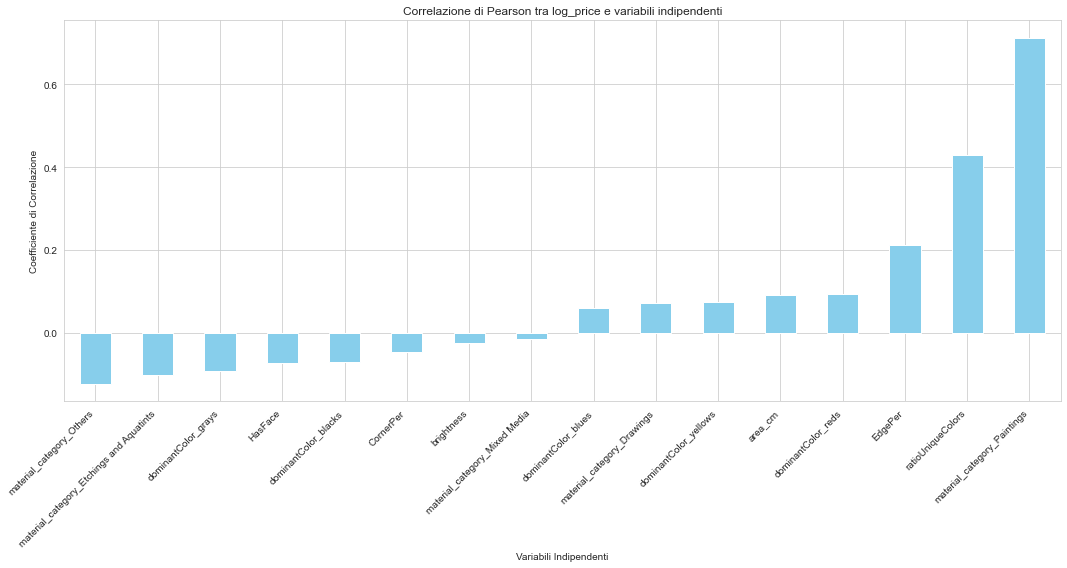

In [48]:
correlation = df_other_artists.corr()['log_price'].drop('log_price')

plt.figure(figsize=(15, 8))
correlation.sort_values().plot(kind='bar', color='skyblue')
plt.title('Correlazione di Pearson tra log_price e variabili indipendenti')
plt.ylabel('Coefficiente di Correlazione')
plt.xlabel('Variabili Indipendenti')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Predictions and Model Evaluation

### Predicting on the Test Set

After training our model on the training data, we use it to make predictions on the test set. This allows us to evaluate how well our model generalizes to new, unseen data.

In [49]:
y_pred = model.predict(X_test_const)

To understand the accuracy of our predictions, we calculate the Root Mean Squared Error (RMSE) and the R^2 value.

RMSE: Represents the square root of the average of the squared differences between the observed actual outcomes and the predictions made by the model. Lower values of RMSE indicate better fit.

R^2: Represents the proportion of the variance for the dependent variable that's explained by independent variables in a regression model. Higher R^2 values represent a better fit.

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 1.3632900991729866
R-squared: 0.6793414579905022


### Visualizing Predictions

A scatter plot is used to visualize the relationship between the actual and predicted log prices. The red line represents the line of perfect prediction.

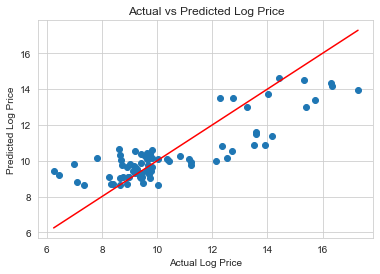

In [51]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Actual vs Predicted Log Price')
plt.show()

### Residual Analysis

Residuals are the differences between the observed and predicted values. Analyzing the distribution of residuals can provide insights into the model's assumptions and potential areas of improvement.

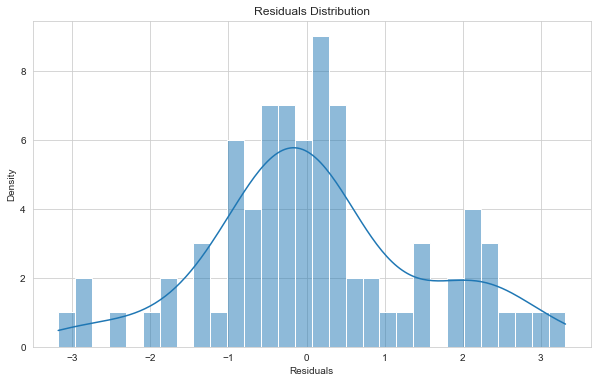

In [52]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [53]:
coefficients = model.params
# compute impact on log_price
price_impact = (np.exp(coefficients) - 1)*100
print(price_impact)

const                                      1663262.46
brightness                                      -0.57
ratioUniqueColors                             2042.02
CornerPer                                       -6.29
EdgePer                                          1.57
area_cm                                          0.00
HasFace                                        -10.41
dominantColor_blacks                           -46.47
dominantColor_blues                             46.95
dominantColor_grays                            -31.10
dominantColor_reds                             -29.99
dominantColor_yellows                          -29.92
material_category_Drawings                     370.97
material_category_Etchings and Aquatints         2.58
material_category_Mixed Media                  162.93
material_category_Others                       -57.09
material_category_Paintings                   4028.26
dtype: float64


# OLS Regression Results Analysis for the New Dataset

## Summary

The OLS regression analysis was performed to understand the influence of several independent variables on the dependent variable `log_price`. The results of the analysis are presented below.

## Results

| Variable                                   | Coefficient | Standard Deviation | Price Impact | Significance |
|--------------------------------------------|-------------|--------------------|--------------|--------------|
| brightness                                 | -0.0057     | 0.002              | -0.57      | **Significant** |
| ratioUniqueColors                          | 3.0643     | 0.414              | 2042.02    | **Significant** |
| CornerPer                                  | -0.0650    | 0.048              | -6.29      |              |
| EdgePer                                    | 0.0156     | 0.017              | 1.57       |              |
| area_cm                                    | 1.408e-06  | 1.02e-06           | 0.00       |              |
| HasFace                                    | -0.1100    | 0.198              | -10.41     |              |
| dominantColor_blacks                       | -0.6249    | 0.234              | -46.47     | **Significant** |
| dominantColor_blues                        | 0.3849     | 0.586              | 46.95      |              |
| dominantColor_grays                        | -0.3726    | 0.159              | -31.10     | **Significant** |
| dominantColor_reds                         | -0.3566    | 0.276              | -29.99     |              |
| dominantColor_yellows                      | -0.3556    | 0.149              | -29.92     | **Significant** |
| material_category_Drawings                 | 1.5496     | 0.142              | 370.97     | **Significant** |
| material_category_Etchings and Aquatints   | 0.0255     | 0.185              | 2.58       |              |
| material_category_Mixed Media              | 0.9667     | 0.640              | 162.93     |              |
| material_category_Others                   | -0.8462    | 0.330              | -57.09     | **Significant** |
| material_category_Paintings                | 3.7204     | 0.151              | 4028.26    | **Significant** |

## Conclusions

From the OLS regression results, it's evident that several variables have a significant impact on `log_price`. Notably:

- `brightness`
- `ratioUniqueColors`
- `dominantColor_blacks`
- `dominantColor_grays`
- `dominantColor_yellows`
- `material_category_Drawings`
- `material_category_Others`
- `material_category_Paintings`

are statistically significant. It's essential to understand that these results are based on a sample of data and might vary with different datasets or under different market conditions.